In [45]:
import  datetime            as dt
import  json
import  matplotlib.pyplot   as plt
import  numpy               as np
import  os
import  pandas              as pd
import  model_utility, color_utility, visuals_utility, data_utility
import  requests
import  seaborn             as sns
import  time

from    dotenv                      import load_dotenv
from    sklearn.model_selection     import train_test_split
from    sklearn.ensemble            import RandomForestClassifier
from    sklearn.metrics             import accuracy_score
#from    sklearn.preprocessing       import StandardScaler

In [46]:
# Set environment variables from the .env in the local environment
load_dotenv()

# Set default values
nfl_api_key     = os.getenv("SDIO_NFL_API_KEY")
nfl_api_url     = "https://api.sportsdata.io/v3/nfl/"
api_feature     = "scores"

display(nfl_api_key)

'1a1888cbff5d4fe0a3fbef4fa6d4f786'

### Data Retrieval
Data is retrieved for each individual week of each season 
using the following url and querystring:

https://api.sportsdata.io/v3/nfl/scores/json/ScoresByWeek/2023/1?key=

Referee data only exists for seasons 2020 and beyond.
2020 was the final 17-week season before the schedule was changed to add week 18.

In [47]:
# Initialize variables
nfl_year        = 2020
nfl_week        = 1
weekly_scores = []

#game_scores_df = response_df[
#    [
#          "GameKey", "Season", "Week", "Date", "GameEndDateTime", "Status", "RefereeID"
#        , "AwayTeamID", "AwayTeam", "HomeTeamID", "HomeTeam", "AwayScore", "HomeScore"
#        #, "Channel", "PointSpread", "OverUnder"
#        #, "OverPayout", "UnderPayout"
#        , "StadiumID"#, "StadiumDetails.StadiumID", "StadiumDetails.Name", "StadiumDetails.City", "StadiumDetails.State"
#        #, "StadiumDetails.Capacity", "StadiumDetails.GeoLat", "StadiumDetails.GeoLong"
#        #, "StadiumDetails.Type", "StadiumDetails.PlayingSurface"
#    ]
#]

# Loop through each season from 2020 to 2023
for x in range(4):
    season = nfl_year + x
    display(f"{season} Season -------------------------------------------------")
    
    # Loop through each week of the season
    for y in range(18):
        week        = nfl_week + y
        
        if (week < 18) or (season > 2020) : # Do not attempt to retrieve Week 18 of 2020 season
            # Assemble url + querystring and retrieve
            query_url   = f"{nfl_api_url}{api_feature}/json/ScoresByWeek/{season}/{week}?key={nfl_api_key}"
            response    = requests.get(query_url).json()
            response_df = pd.json_normalize(response)

            # Show progress
            display(f"Season {season} | Week {week}: Retrieved", display_id="Output")

            # Append data to Weekly Scores list
            weekly_scores.append (
                response_df[
                    [
                          "GameKey"
                        , "Season"
                        , "Week"
                        , "Date"
                        , "GameEndDateTime"
                        , "Status"
                        , "RefereeID"
                        , "AwayTeamID"
                        , "AwayTeam"
                        , "HomeTeamID"
                        , "HomeTeam"
                        , "AwayScore"
                        , "HomeScore"
                        , "StadiumID"
                    ]
                ]
            )
 # Add weekly scores to all game scores
game_scores_df = pd.concat(weekly_scores, ignore_index=True)
display(game_scores_df.head())

'2020 Season -------------------------------------------------'

'Season 2020 | Week 1: Retrieved'

'Season 2020 | Week 2: Retrieved'

'Season 2020 | Week 3: Retrieved'

'Season 2020 | Week 4: Retrieved'

'Season 2020 | Week 5: Retrieved'

'Season 2020 | Week 6: Retrieved'

'Season 2020 | Week 7: Retrieved'

'Season 2020 | Week 8: Retrieved'

'Season 2020 | Week 9: Retrieved'

'Season 2020 | Week 10: Retrieved'

'Season 2020 | Week 11: Retrieved'

'Season 2020 | Week 12: Retrieved'

'Season 2020 | Week 13: Retrieved'

'Season 2020 | Week 14: Retrieved'

'Season 2020 | Week 15: Retrieved'

'Season 2020 | Week 16: Retrieved'

'Season 2020 | Week 17: Retrieved'

'2021 Season -------------------------------------------------'

'Season 2021 | Week 1: Retrieved'

'Season 2021 | Week 2: Retrieved'

'Season 2021 | Week 3: Retrieved'

'Season 2021 | Week 4: Retrieved'

'Season 2021 | Week 5: Retrieved'

'Season 2021 | Week 6: Retrieved'

'Season 2021 | Week 7: Retrieved'

'Season 2021 | Week 8: Retrieved'

'Season 2021 | Week 9: Retrieved'

'Season 2021 | Week 10: Retrieved'

'Season 2021 | Week 11: Retrieved'

'Season 2021 | Week 12: Retrieved'

'Season 2021 | Week 13: Retrieved'

'Season 2021 | Week 14: Retrieved'

'Season 2021 | Week 15: Retrieved'

'Season 2021 | Week 16: Retrieved'

'Season 2021 | Week 17: Retrieved'

'Season 2021 | Week 18: Retrieved'

'2022 Season -------------------------------------------------'

'Season 2022 | Week 1: Retrieved'

'Season 2022 | Week 2: Retrieved'

'Season 2022 | Week 3: Retrieved'

'Season 2022 | Week 4: Retrieved'

'Season 2022 | Week 5: Retrieved'

'Season 2022 | Week 6: Retrieved'

'Season 2022 | Week 7: Retrieved'

'Season 2022 | Week 8: Retrieved'

'Season 2022 | Week 9: Retrieved'

'Season 2022 | Week 10: Retrieved'

'Season 2022 | Week 11: Retrieved'

'Season 2022 | Week 12: Retrieved'

'Season 2022 | Week 13: Retrieved'

'Season 2022 | Week 14: Retrieved'

'Season 2022 | Week 15: Retrieved'

'Season 2022 | Week 16: Retrieved'

'Season 2022 | Week 17: Retrieved'

'Season 2022 | Week 18: Retrieved'

'2023 Season -------------------------------------------------'

'Season 2023 | Week 1: Retrieved'

'Season 2023 | Week 2: Retrieved'

'Season 2023 | Week 3: Retrieved'

'Season 2023 | Week 4: Retrieved'

'Season 2023 | Week 5: Retrieved'

'Season 2023 | Week 6: Retrieved'

'Season 2023 | Week 7: Retrieved'

'Season 2023 | Week 8: Retrieved'

'Season 2023 | Week 9: Retrieved'

'Season 2023 | Week 10: Retrieved'

'Season 2023 | Week 11: Retrieved'

'Season 2023 | Week 12: Retrieved'

'Season 2023 | Week 13: Retrieved'

'Season 2023 | Week 14: Retrieved'

'Season 2023 | Week 15: Retrieved'

'Season 2023 | Week 16: Retrieved'

'Season 2023 | Week 17: Retrieved'

'Season 2023 | Week 18: Retrieved'

,GameKey,Season,Week,Date,GameEndDateTime,Status,RefereeID,AwayTeamID,AwayTeam,HomeTeamID,HomeTeam,AwayScore,HomeScore,StadiumID
0,202010116,2020,1,2020-09-10T20:20:00,2020-09-11T00:05:13,Final,10.0,13,HOU,16,KC,27.0,47.0,15
1,202010102,2020,1,2020-09-13T13:00:00,2020-09-13T16:10:05,Final,51.0,30,SEA,2,ATL,52.0,34.0,45
2,202010104,2020,1,2020-09-13T13:00:00,2020-09-13T16:13:39,Final,101.0,24,NYJ,4,BUF,23.0,37.0,1
3,202010111,2020,1,2020-09-13T13:00:00,2020-09-13T16:18:59,Final,59.0,6,CHI,11,DET,37.0,31.0,21
4,202010120,2020,1,2020-09-13T13:00:00,2020-09-13T16:14:52,Final,112.0,12,GB,20,MIN,59.0,47.0,42


In [75]:
#game_scores_df.dtypes

def get_winner_id(row):
    if row["AwayScore"] > row["HomeScore"] :
        return int(row["AwayTeamID"])
    elif row["AwayScore"] < row["HomeScore"] :
        return int(row["HomeTeamID"])
    else :
        return 0
    
def get_winner(row):
    if row["AwayScore"] > row["HomeScore"] :
        return row["AwayTeam"]
    elif row["AwayScore"] < row["HomeScore"] :
        return row["HomeTeam"]
    else :
        return None
    
def home_team_win(row):
    if row["AwayScore"] < row["HomeScore"] :
        return 1
    else :
        return 0

# Add column to store winning team's ID
game_scores_df["WinningTeamID"] = game_scores_df.apply(get_winner_id, axis = 1)
game_scores_df["WinningTeam"]   = game_scores_df.apply(get_winner   , axis = 1)
game_scores_df["HomeTeamWin"]   = game_scores_df.apply(home_team_win, axis = 1)
display(game_scores_df)


,GameKey,Season,Week,Date,GameEndDateTime,Status,RefereeID,AwayTeamID,AwayTeam,HomeTeamID,HomeTeam,AwayScore,HomeScore,StadiumID,WinningTeamID,WinningTeam,HomeTeamWin
0,202010116,2020,1,2020-09-10T20:20:00,2020-09-11T00:05:13,Final,10.0,13,HOU,16,KC,27.0,47.0,15,16,KC,1
1,202010102,2020,1,2020-09-13T13:00:00,2020-09-13T16:10:05,Final,51.0,30,SEA,2,ATL,52.0,34.0,45,30,SEA,0
2,202010104,2020,1,2020-09-13T13:00:00,2020-09-13T16:13:39,Final,101.0,24,NYJ,4,BUF,23.0,37.0,1,4,BUF,1
3,202010111,2020,1,2020-09-13T13:00:00,2020-09-13T16:18:59,Final,59.0,6,CHI,11,DET,37.0,31.0,21,6,CHI,0
4,202010120,2020,1,2020-09-13T13:00:00,2020-09-13T16:14:52,Final,112.0,12,GB,20,MIN,59.0,47.0,42,12,GB,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,202311829,2023,18,2024-01-07T16:25:00,2024-01-07T19:24:47,Final,76.0,16,KC,29,LAC,20.0,19.0,54,16,KC,0
1077,202311831,2023,18,2024-01-07T16:25:00,2024-01-07T19:19:12,Final,66.0,32,LAR,31,SF,33.0,31.0,37,32,LAR,0
1078,202311835,2023,18,2024-01-07T16:25:00,2024-01-07T19:11:16,Final,101.0,9,DAL,35,WAS,60.0,16.0,19,9,DAL,0
1079,202311805,2023,18,2024-01-07T13:00:00,2024-01-07T15:38:17,Final,10.0,33,TB,5,CAR,14.0,0.0,26,33,TB,0


In [77]:
game_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GameKey          1074 non-null   object 
 1   Season           1081 non-null   int64  
 2   Week             1081 non-null   int64  
 3   Date             1081 non-null   object 
 4   GameEndDateTime  1071 non-null   object 
 5   Status           1081 non-null   object 
 6   RefereeID        1071 non-null   float64
 7   AwayTeamID       1081 non-null   int64  
 8   AwayTeam         1081 non-null   object 
 9   HomeTeamID       1081 non-null   int64  
 10  HomeTeam         1081 non-null   object 
 11  AwayScore        1072 non-null   float64
 12  HomeScore        1072 non-null   float64
 13  StadiumID        1081 non-null   int64  
 14  WinningTeamID    1081 non-null   int64  
 15  WinningTeam      1045 non-null   object 
 16  HomeTeamWin      1081 non-null   int64  
dtypes: float64(3),

### Feature Selection

In [79]:
# Data Preprocessing : Create DataFrame with features and target variable

features = [
    #, "Date"
    #, "Status"
     "AwayTeamID"
    , "AwayTeam"
    #, "AwayScore"
    , "HomeTeamID"
    , "HomeTeam"
    #, "HomeScore"
    , "WinningTeamID"
    , "WinningTeam"
    , "HomeTeamWin"
    , "StadiumID"
    , "RefereeID"
]

referee_scores_df = game_scores_df[features].copy()
referee_scores_df.dropna(inplace=True)
referee_scores_df.reset_index(drop=True, inplace=True)
referee_scores_df["RefereeID"] = referee_scores_df["RefereeID"].astype(int)
referee_scores_df.info()
display(referee_scores_df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AwayTeamID     1044 non-null   int64 
 1   AwayTeam       1044 non-null   object
 2   HomeTeamID     1044 non-null   int64 
 3   HomeTeam       1044 non-null   object
 4   WinningTeamID  1044 non-null   int64 
 5   WinningTeam    1044 non-null   object
 6   HomeTeamWin    1044 non-null   int64 
 7   StadiumID      1044 non-null   int64 
 8   RefereeID      1044 non-null   int32 
dtypes: int32(1), int64(5), object(3)
memory usage: 69.5+ KB


,AwayTeamID,AwayTeam,HomeTeamID,HomeTeam,WinningTeamID,WinningTeam,HomeTeamWin,StadiumID,RefereeID
0,13,HOU,16,KC,16,KC,1,15,10
1,30,SEA,2,ATL,30,SEA,0,45,51
2,24,NYJ,4,BUF,4,BUF,1,1,101
3,6,CHI,11,DET,6,CHI,0,21,59
4,12,GB,20,MIN,12,GB,0,42,112
...,...,...,...,...,...,...,...,...,...
1039,16,KC,29,LAC,16,KC,0,54,76
1040,32,LAR,31,SF,32,LAR,0,37,66
1041,9,DAL,35,WAS,9,DAL,0,19,101
1042,33,TB,5,CAR,33,TB,0,26,10


In [82]:
# Split data into features (X) and target variable (y)
referee_scores_df = referee_scores_df.select_dtypes(include='number')
X = referee_scores_df.drop(['HomeTeamWin'], axis=1)  # Features
y = referee_scores_df['HomeTeamWin']  # Target variable

display(y.value_counts())
print((y.value_counts() / len(y)) * 100)

HomeTeamWin
1    558
0    486
Name: count, dtype: int64

HomeTeamWin
1    53.448276
0    46.551724
Name: count, dtype: float64


### Model Selection

In [84]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X
    , y
    , test_size     = 0.2
    , random_state  = 42
    #, max_iter      = 50
)

model_results = model_utility.process_models(
      model_utility.classification_models
    , X_train
    , X_test
    , y_train
    , y_test
)

for m_name, m_data in model_results.items():
    print(f"{m_name} : accuracy_score : {m_data['accuracy_score']:.5f}")
    print(f"{m_name} : balanced_accuracy_score : {m_data['balanced_accuracy_score']:.5f}\n")

Logistic Regression : accuracy_score : 0.62201
Logistic Regression : balanced_accuracy_score : 0.58459

SVC : accuracy_score : 0.79904
SVC : balanced_accuracy_score : 0.77290

KNeighbors Classifier : accuracy_score : 0.83732
KNeighbors Classifier : balanced_accuracy_score : 0.83148

DecisionTree Classifier : accuracy_score : 0.94258
DecisionTree Classifier : balanced_accuracy_score : 0.94407

RandomForest Classifier : accuracy_score : 0.94737
RandomForest Classifier : balanced_accuracy_score : 0.94486



c:\Users\Joe\anaconda3\envs\dev-ai\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Joe\anaconda3\envs\dev-ai\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


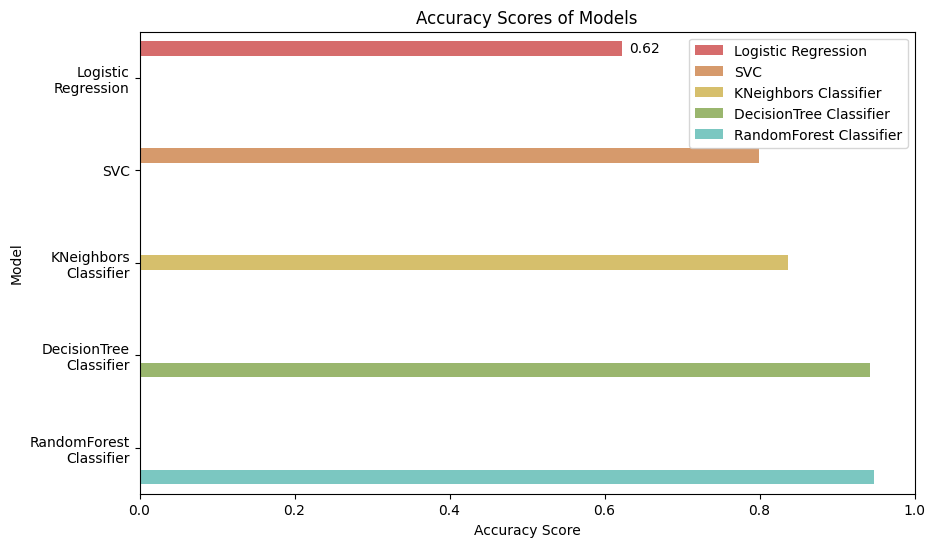

In [89]:
# visual representation of accuracy scores
visuals_utility.show_accuracy_scores(
    {m_name:m_data['accuracy_score'] for m_name, m_data in model_results.items()}
)


In [90]:
# Choose a classification model
model = RandomForestClassifier(n_estimators=100)

# 4. Model Training


# Train the model
model.fit(X_train, y_train)

# 5. Model Evaluation
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9521531100478469


In [91]:
# check how the numerical features are distributed
numerical_features_df = referee_scores_df.select_dtypes(include=['float64', 'int64'])
numerical_features_df.describe()

,AwayTeamID,HomeTeamID,WinningTeamID,HomeTeamWin,StadiumID
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,17.761494,17.744253,18.090038,0.534483,20.687739
std,10.454376,10.390954,10.453730,0.499049,16.114589
min,1.000000,1.000000,1.000000,0.000000,1.000000
25%,9.000000,9.000000,9.000000,0.000000,8.000000
50%,19.000000,19.000000,19.000000,1.000000,18.000000
75%,28.000000,26.000000,28.000000,1.000000,29.000000
max,35.000000,35.000000,35.000000,1.000000,86.000000


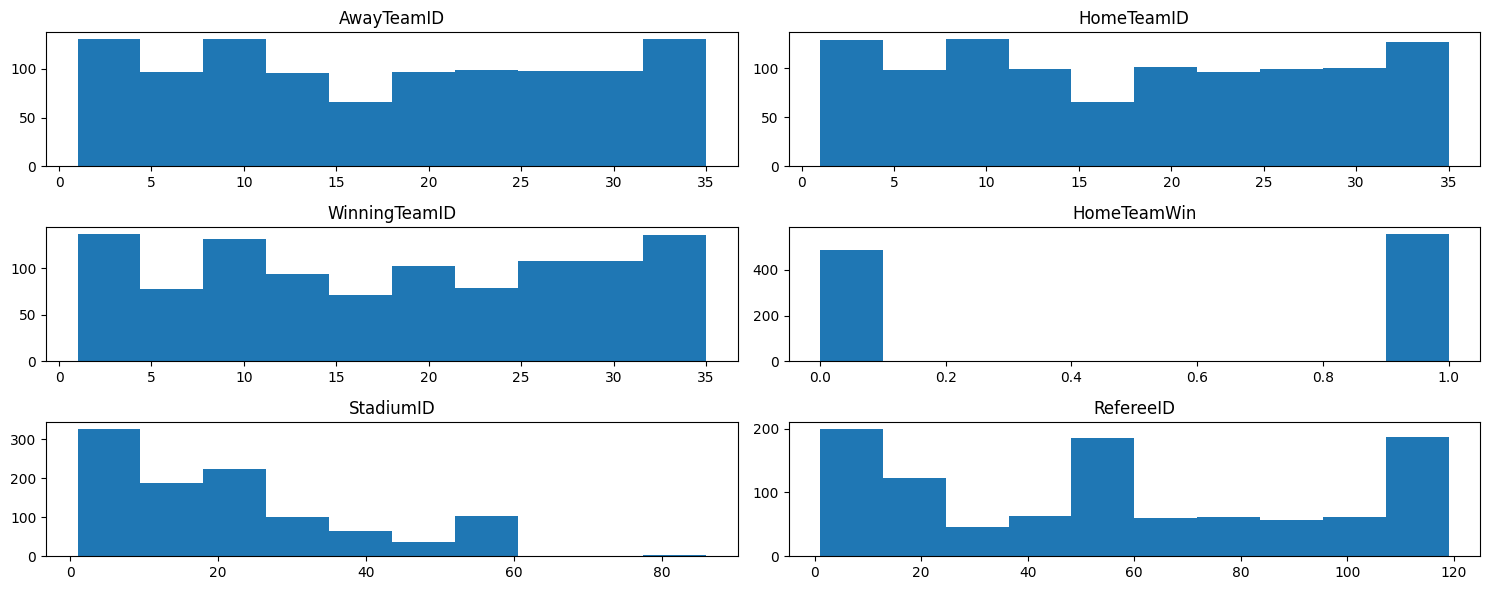

In [92]:
referee_scores_df.hist(figsize=(15,6), grid=False)
plt.tight_layout()
plt.show()

In [ ]:
# Create filter for data
data_filter = (
      (economic_data_df["Median Household Income"]          != 0)
    & (economic_data_df["Median Household Income (adj)"]    != 0)
)

# Create a figure with four subplots arranged in 4 rows
fig, axes = plt.subplots(4, 1, figsize=(20, 16))

# Plot Median Household Income with Adjustment for Inflation in the first row
axes[0].plot(
      pd.to_datetime(economic_data_df[data_filter]["Date"]).dt.year
    , economic_data_df[data_filter]["Median Household Income"]
    , marker    = ""
    , linestyle = "-"
    , color     = "blue"
    , label     = "Median Household Income"
)

In [109]:
referee_scores_df[referee_scores_df["RefereeID"] == 119]

,AwayTeamID,HomeTeamID,WinningTeamID,HomeTeamWin,StadiumID,RefereeID
14,28,23,28,0,3,119
30,21,30,30,1,31,119
40,24,14,14,1,9,119
48,14,6,14,0,20,119
72,23,9,9,1,17,119
...,...,...,...,...,...,...
973,20,25,20,0,53,119
992,9,4,4,1,1,119
999,7,28,28,1,8,119
1026,29,10,10,1,13,119


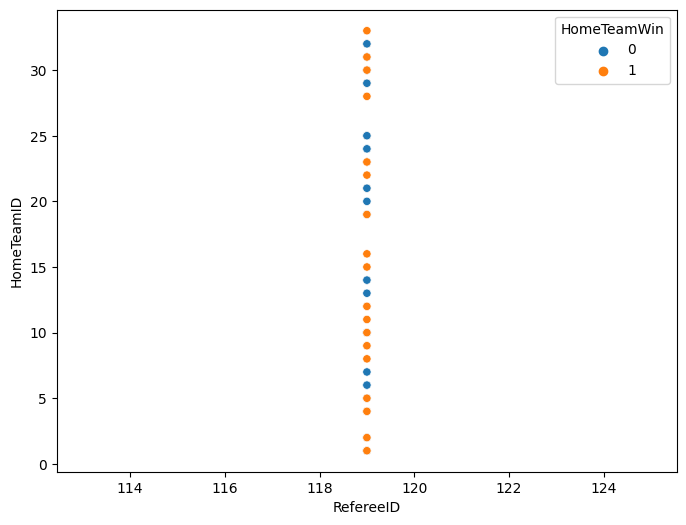

In [112]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=referee_scores_df[referee_scores_df["RefereeID"] == 119]
    , x='RefereeID'
    , y='HomeTeamID'
    , hue='HomeTeamWin')
plt.show()

In [127]:
# Group the data by referee, winning team, and team type (HomeTeam or AwayTeam), and count occurrences
referee_winning_team_counts = referee_scores_df.groupby(["RefereeID", 'WinningTeamID']).size().reset_index(name='Count')
referee_away_team_counts    = referee_scores_df.groupby(["RefereeID", 'AwayTeamID']).size().reset_index(name='Count')
referee_home_team_counts    = referee_scores_df.groupby(["RefereeID", 'HomeTeamID']).size().reset_index(name='Count')
referee_home_team_win_cnts  = referee_scores_df.groupby(["RefereeID", 'HomeTeamWin']).size().reset_index(name='Count')

display(referee_home_team_win_cnts)

referee_winning_team_counts = referee_winning_team_counts.rename(columns={"WinningTeamID":"TeamID", "Count":"Wins"})
referee_away_team_counts    = referee_away_team_counts.rename(columns={"AwayTeamID":"TeamID", "Count":"AwayTeamCount"})
referee_home_team_counts    = referee_home_team_counts.rename(columns={"HomeTeamID":"TeamID", "Count":"HomeTeamCount"})

referees_teams_df = pd.merge(
      referee_winning_team_counts
    , referee_home_team_counts
    , on    = ["RefereeID", "TeamID"]
    , how   = "left"
)

referees_teams_df = pd.merge(
      referees_teams_df
    , referee_away_team_counts
    , on    = ["RefereeID", "TeamID"]
    , how   = "left"
)

referees_teams_df.fillna(0, inplace=True)
referees_teams_df["GameCount"]  = referees_teams_df["HomeTeamCount"]  + referees_teams_df["AwayTeamCount"] 
referees_teams_df["Win_Pct"]    = referees_teams_df["Wins"] / referees_teams_df["GameCount"]
referees_teams_df["Loss_Pct"]   = (referees_teams_df["GameCount"] - referees_teams_df["Wins"]) / referees_teams_df["GameCount"]
referees_teams_df["HomeTeamCount"] = referees_teams_df["HomeTeamCount"].astype(int)
referees_teams_df["AwayTeamCount"] = referees_teams_df["AwayTeamCount"].astype(int)
referees_teams_df["GameCount"] = referees_teams_df["GameCount"].astype(int)

display(referees_teams_df)

,RefereeID,HomeTeamWin,Count
0,1,0,29
1,1,1,34
2,9,0,12
3,9,1,18
4,10,0,26
5,10,1,35
6,12,0,19
7,12,1,27
8,23,0,29
9,23,1,34


,RefereeID,TeamID,Wins,HomeTeamCount,AwayTeamCount,GameCount,Win_Pct,Loss_Pct
0,1,1,1,0,2,2,0.500000,0.500000
1,1,2,1,3,1,4,0.250000,0.750000
2,1,3,2,4,2,6,0.333333,0.666667
3,1,4,2,0,2,2,1.000000,0.000000
4,1,5,2,2,2,4,0.500000,0.500000
...,...,...,...,...,...,...,...,...
506,119,30,3,4,0,4,0.750000,0.250000
507,119,31,3,2,3,5,0.600000,0.400000
508,119,32,2,3,2,5,0.400000,0.600000
509,119,33,1,1,3,4,0.250000,0.750000


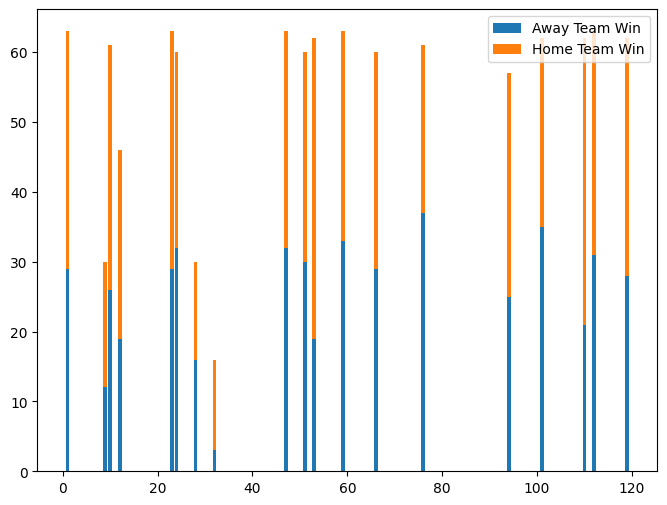

In [175]:



plt.figure(figsize=(8,6))
#sns.scatterplot(
#    data=referee_home_team_win_cnts[referee_home_team_win_cnts["RefereeID"] == 119]
#    , x='RefereeID'
#    , y='Count'
#    , hue="HomeTeamWin"
#)

x_values_1  = referee_home_team_win_cnts[referee_home_team_win_cnts["HomeTeamWin"] == 0]["RefereeID"]
y_segment_1 = referee_home_team_win_cnts[referee_home_team_win_cnts["HomeTeamWin"] == 0]["Count"]

x_values_2  = referee_home_team_win_cnts[referee_home_team_win_cnts["HomeTeamWin"] == 1]["RefereeID"]
y_segment_2 = referee_home_team_win_cnts[referee_home_team_win_cnts["HomeTeamWin"] == 1]["Count"]

plt.bar(
      referee_by_team_win_type["RefereeID"]
    , referee_by_team_win_type["AwayTeamWins"]
    , label   = "Away Team Win"
    #, color = "b"
)

plt.bar(
      referee_by_team_win_type["RefereeID"]
    , referee_by_team_win_type["HomeTeamWins"]
    , label = "Home Team Win"
    #, color = "r"
    , bottom  = referee_by_team_win_type["AwayTeamWins"]
  )

#plt.title("Referee vs Home/Away Wins")
#plt.ylabel("Games")
plt.legend()
plt.show()
